In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import seaborn as sns

In [11]:
df = pd.read_csv('vendas.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    36 non-null     object
 1   Vendas  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [13]:
df.Data = pd.to_datetime(df.Data,format='%d/%m/%Y')
print(df.info())
print(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    36 non-null     datetime64[ns]
 1   Vendas  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes
None
        Data  Vendas
0 2019-01-01     200


In [14]:
col = ['ano','mes','dia']
formato = ['%Y','%m','%d']


vendas = df.copy()

for c, f in zip(col, formato) :
    vendas[c] = vendas.Data.apply(lambda x: x.strftime(f'{f}'))

vendas.head(5)

,Data,Vendas,ano,mes,dia
0,2019-01-01,200,2019,01,01
1,2019-02-01,180,2019,02,01
2,2019-03-01,220,2019,03,01
3,2019-04-01,240,2019,04,01
4,2019-05-01,260,2019,05,01


In [15]:
vendas.index = vendas['Data']
vendas.drop('Data',axis=1, inplace=True)
vendas.head(3)

,Vendas,ano,mes,dia
Data,,,,
2019-01-01,200,2019,01,01
2019-02-01,180,2019,02,01
2019-03-01,220,2019,03,01


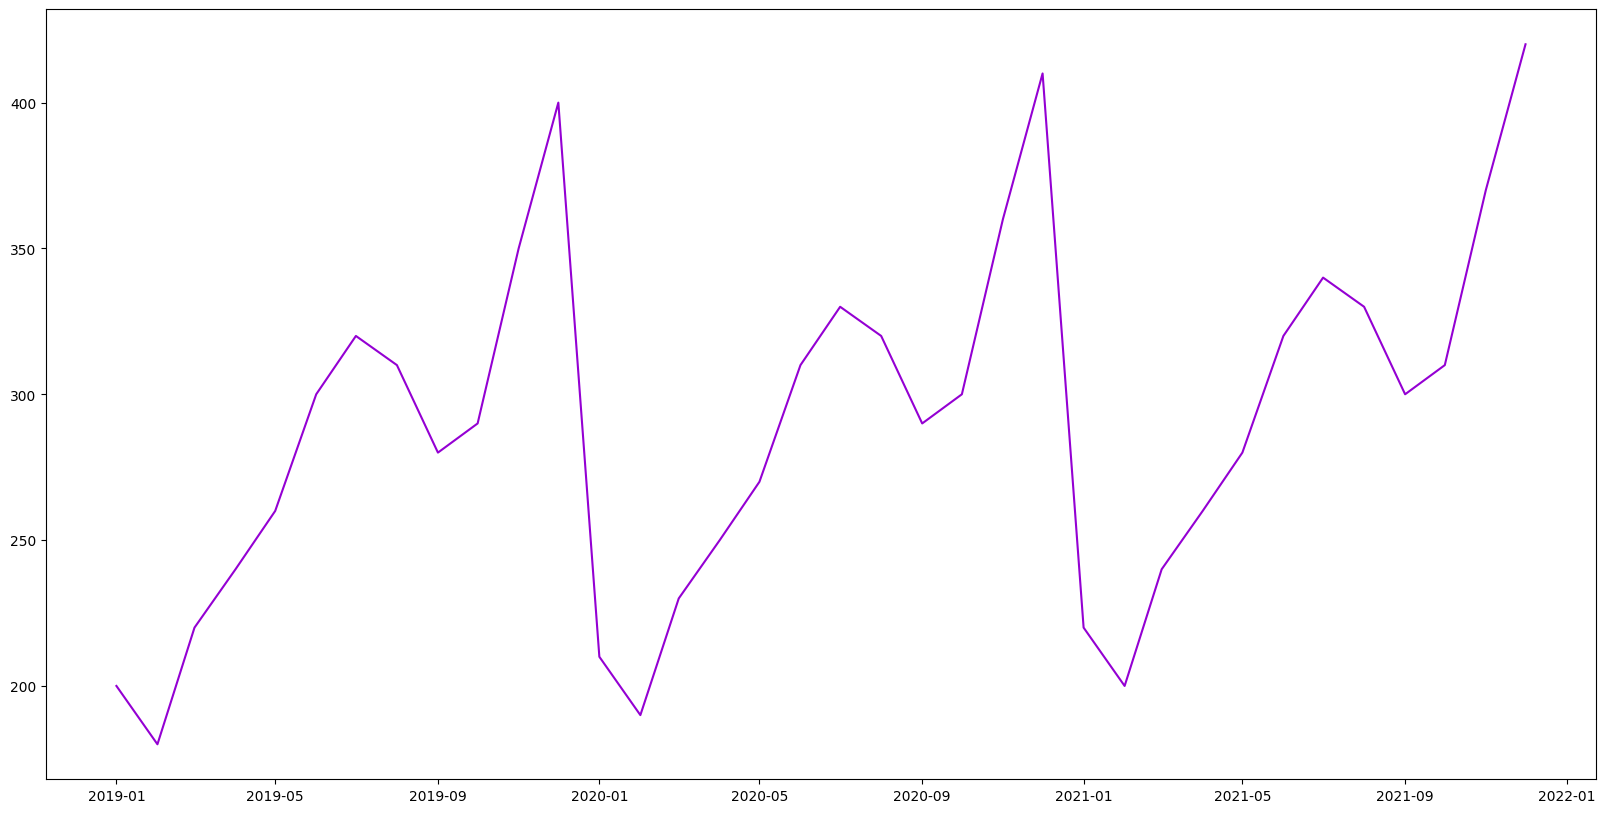

In [16]:
plt.figure(figsize=(20,10))
plt.plot(vendas.index, vendas.Vendas, color='darkviolet')

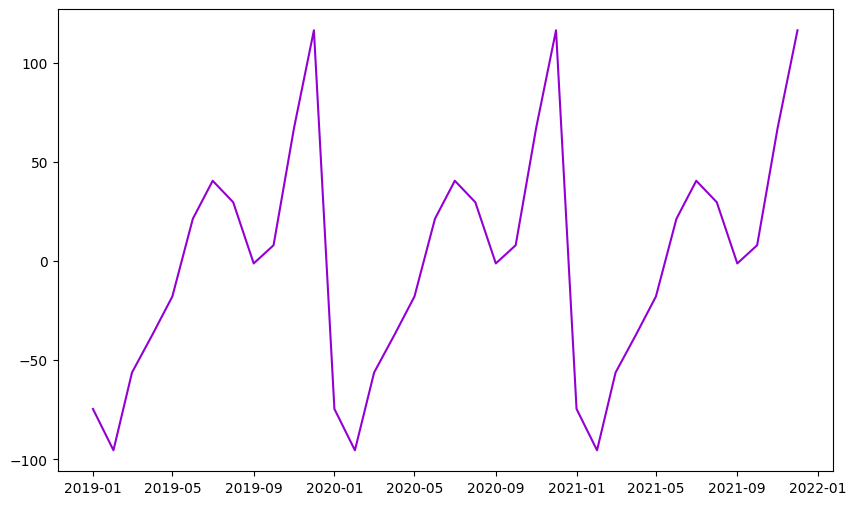

In [17]:
decomposicao = seasonal_decompose(vendas['Vendas'], period=12)
decomposicao

plt.figure(figsize=(10, 6))
plt.plot(decomposicao.seasonal, color='darkviolet')

In [18]:
vendas['sazonalidade'] = decomposicao.seasonal

In [19]:
vendas.head(3)

,Vendas,ano,mes,dia,sazonalidade
Data,,,,,
2019-01-01,200,2019,01,01,-74.583333
2019-02-01,180,2019,02,01,-95.416667
2019-03-01,220,2019,03,01,-56.250000


In [23]:
vendas['Vendas Ajustadas'] = vendas['Vendas'] - vendas['sazonalidade']
vendas.head(12)

,Vendas,ano,mes,dia,sazonalidade,Vendas Ajustadas
Data,,,,,,
2019-01-01,200,2019,01,01,-74.583333,274.583333
2019-02-01,180,2019,02,01,-95.416667,275.416667
2019-03-01,220,2019,03,01,-56.250000,276.250000
2019-04-01,240,2019,04,01,-37.083333,277.083333
2019-05-01,260,2019,05,01,-17.916667,277.916667
2019-06-01,300,2019,06,01,21.250000,278.750000
2019-07-01,320,2019,07,01,40.416667,279.583333
2019-08-01,310,2019,08,01,29.583333,280.416667
2019-09-01,280,2019,09,01,-1.250000,281.250000


In [24]:
vendas['Vendas Ajustadas'] = vendas['Vendas Ajustadas'].apply(lambda x: f'{x:.2f}')
vendas

,Vendas,ano,mes,dia,sazonalidade,Vendas Ajustadas
Data,,,,,,
2019-01-01,200,2019,01,01,-74.583333,274.58
2019-02-01,180,2019,02,01,-95.416667,275.42
2019-03-01,220,2019,03,01,-56.250000,276.25
2019-04-01,240,2019,04,01,-37.083333,277.08
2019-05-01,260,2019,05,01,-17.916667,277.92
2019-06-01,300,2019,06,01,21.250000,278.75
2019-07-01,320,2019,07,01,40.416667,279.58
2019-08-01,310,2019,08,01,29.583333,280.42
2019-09-01,280,2019,09,01,-1.250000,281.25


In [25]:
nome_arquivo = 'vendas_ajustadas.csv'
vendas.to_csv(nome_arquivo, index=False, encoding='utf-8')